# 環境構築


*   Pythonモジュールへのパス追加
*   PyVista, KerasTunerのインストール


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import sys
sys.path.append('/home/i9-10920x/ML/modules')

In [3]:
# !pip install keras-tuner --upgrade

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import interpolate
import show_mod

# 前処理

In [7]:
#読み込むデータのパスの設定

data_path = '/home/i9-10920x/ML/MLTrial/data'
input_list = glob.glob(data_path+"/*"+"/inputdata.csv")


In [9]:
#input(空調条件等)の読み込み
df_input = None

for input_fname in input_list:
    df_read = pd.read_csv(input_fname, index_col="case_name")
    if df_input is None:
        df_input = df_read
    else:
        df_input = pd.concat([df_input, df_read])

df_input

,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,2_z,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
case_name,,,,,,,,,,,,,,,,,,,,,
office2_960_164_aout,960,164,a,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_960_82_bout,960,82,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_960_246_bout,960,246,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_660_164_bout,660,164,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_0_164_bout,0,164,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office28_960_82_bout,960,82,b,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00
office28_660_0,660,0,off,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00
office28_360_246_aout,360,246,a,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00


In [15]:
#空調条件のみ抽出
df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

df_meta

,aircon,ventilation,exhaust
case_name,,,
office2_960_164_aout,960,164,a
office2_960_82_bout,960,82,b
office2_960_246_bout,960,246,b
office2_660_164_bout,660,164,b
office2_0_164_bout,0,164,b
...,...,...,...
office28_960_82_bout,960,82,b
office28_660_0,660,0,off
office28_360_246_aout,360,246,a


In [16]:
#排気口位置a,b,offをダミー変数化

df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# dummies = pd.get_dummies(df_input['exhaust'])
# df_input.drop("exhaust", axis=1, inplace=True)
# df_input = pd.concat([df_input, dummies], axis=1)
# df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
#           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
#           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
#           ,"aircon_position_x","aircon_position_y"])

df_meta

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_960_164_aout,960,164,1,0,0
office2_960_82_bout,960,82,0,1,0
office2_960_246_bout,960,246,0,1,0
office2_660_164_bout,660,164,0,1,0
office2_0_164_bout,0,164,0,1,0
...,...,...,...,...,...
office28_960_82_bout,960,82,0,1,0
office28_660_0,660,0,0,0,1
office28_360_246_aout,360,246,1,0,0


In [17]:
#入力データフレームのインデックス順に、感染リスク分布ファイルを読み込むためのパスリスト作成
case_index_list = list(df_meta.index)

path2data = '/home/i9-10920x/ML/MLTrial/data'

distribution_path_list = []
for case_index in case_index_list:
    str_list = case_index.split('_', maxsplit=1)
    distribution_path_list.append(path2data + '/' + str_list[0] + '/data/' + str_list[1] + '/risk_dist.csv')

# distribution_path_list

In [18]:
#高さと幅の最大値の取得

max_height = 0
max_width = 0
for file_path in distribution_path_list:
    array_read = np.loadtxt(file_path, delimiter=",", dtype=np.float32)
    max_height = max(max_height, array_read.shape[0])
    max_width = max(max_width, array_read.shape[1])

print(max_height, max_width)

65 95


In [19]:
#−１パディングでサイズ合わせ
distributionArray_list = []

for file_path in distribution_path_list:
    array_read = np.loadtxt(file_path, delimiter=",", dtype=np.float32)
    array_padded = np.pad(array=array_read, pad_width=[(0, max_height - array_read.shape[0]), (0,  max_width - array_read.shape[1])],\
                        mode="constant", constant_values = (-1) )
    distributionArray_list.append(array_padded)

distributionArray_padded = np.array(distributionArray_list)
distributionArray_padded.shape

(263, 65, 95)

In [20]:
# np_output = np.empty((max_num_row, max_num_column))
# for i in range(num_output):
#     np_temp = np.loadtxt(output_list[i], delimiter=",", dtype=np.float32)
    
#     if np_temp.shape[0] < max_num_row :
#         nan = np.empty((max_num_row - int(np_temp.shape[0]), max_num_column))
#         nan[max_num_row - int(np_temp.shape[0]), max_num_column] = np.nan
#         np.insert(np_temp, int(np_temp.shape[0]) + 1 : max_num_row, :] = np.nan
#     if np_temp.shape[1] < max_num_column :
#         np_temp[:, int(np_temp.shape[1]) + 1:] = np.nan 
    
#     np_output = np.append(np_output, np_temp, axis=0)
    
# output = []
# for i in range(num_output):
#     with open (output_list[i], "r") as csv_fname:
#         reader = csv.reader(csv_fname)
#         temp_list = [row for row in reader]
#         output.append(temp_list)

In [21]:
#可視化用カラーマップの作成
cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
# cmap = show_mod.make_colormap(["blue", "white", "red"])

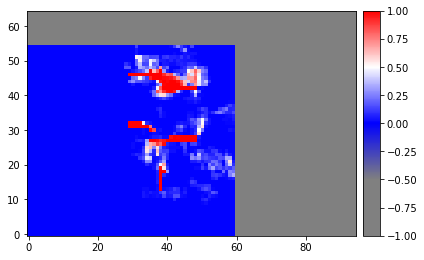

In [22]:
#選んだ1個をプロット
show_mod.show_image(distributionArray_padded[25], cbar=True, cmap=cmap)

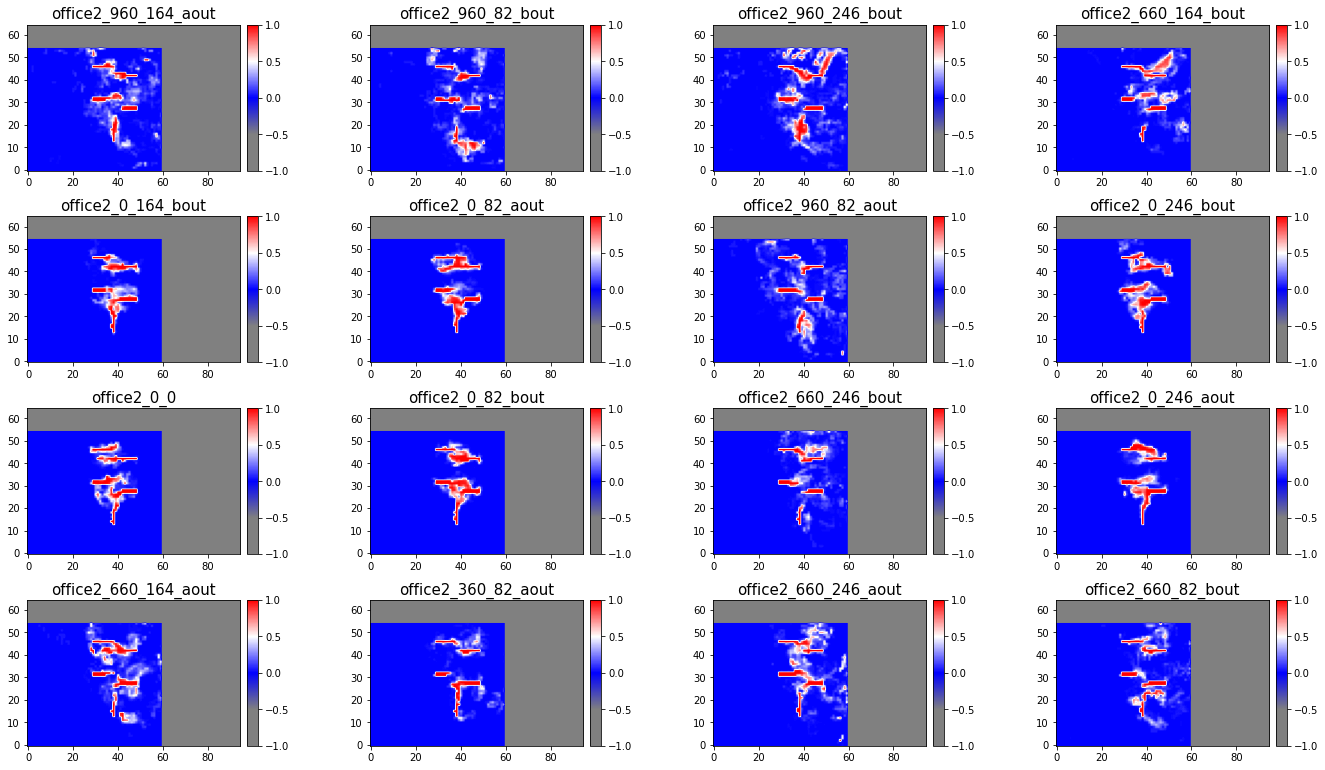

In [23]:
#複数プロット
show_mod.show_images(distributionArray_padded, title_name=case_index_list, row=4, column=4, cbar=True, cmap=cmap)

In [24]:
# np_output_2D = df_output_2D.to_numpy()
# np_output_3D = np_output_2D.reshape(office_list.shape[0], max_num_row, max_num_column)

In [25]:
# np_output_3D.shape

In [26]:
# plt.imshow(np_output_3D[0], cmap="bwr", origin="lower")

In [27]:
from sklearn import preprocessing

#入力データの標準化
stdscaler = preprocessing.StandardScaler()
stdscaler.fit(df_meta)
df_meta_tf = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_tf, index=df_meta.index, columns=df_meta.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_960_164_aout,1.261546,0.294952,1.143249,-0.874700,-0.391802
office2_960_82_bout,1.261546,-0.686976,-0.874700,1.143249,-0.391802
office2_960_246_bout,1.261546,1.276880,-0.874700,1.143249,-0.391802
office2_660_164_bout,0.435795,0.294952,-0.874700,1.143249,-0.391802
office2_0_164_bout,-1.380856,0.294952,-0.874700,1.143249,-0.391802
...,...,...,...,...,...
office28_960_82_bout,1.261546,-0.686976,-0.874700,1.143249,-0.391802
office28_660_0,0.435795,-1.668904,-0.874700,-0.874700,2.552310
office28_360_246_aout,-0.389955,1.276880,1.143249,-0.874700,-0.391802


In [71]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room_and_desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。
"""
officemodel_path = '/home/i9-10920x/ML/officemodel'
# office_list = os.listdir(officemodel_path)
case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
print(office_list)

# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

sampledPointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            mesh_read = mesh.Mesh.from_file(stlfname)
            points = mesh_read.points.reshape([-1, 3])
            # print(points.shape)
            points = np.unique(points, axis=0)
            # print(points.shape)
            pc_list.append(points)

        # print(np.concatenate(pc_list).shape)
        pc_dict[part] = np.concatenate(pc_list)

    pc_aircon = pc_dict[OfficePart.aircon]
    pc_airvent = pc_dict[OfficePart.airvent]
    num_sampling = NUM_POINTS - (len(pc_aircon) + len(pc_airvent))
    print(num_sampling)

    pc_forSampling = np.concatenate([pc_dict[OfficePart.body], pc_dict[OfficePart.room_and_desks]])
    rand_list = random.sample(range(len(pc_forSampling)), k=num_sampling)
    pc_sampled = pc_forSampling[rand_list, :]
    
    pointCloud = np.concatenate([pc_aircon, pc_airvent, pc_sampled])
    print(pointCloud.shape)
    sampledPointCloud_dict[officename] = pointCloud


['case2', 'case7', 'case1', 'case10', 'case22', 'case3', 'case15', 'case16', 'case28']
OfficePart.aircon
OfficePart.airvent
OfficePart.body
OfficePart.room_and_desks
['/home/i9-10920x/ML/officemodel/case2/aircon/aircon_inlets.stl', '/home/i9-10920x/ML/officemodel/case2/aircon/aircon_body.stl', '/home/i9-10920x/ML/officemodel/case2/aircon/aircon_outlet.stl']
['/home/i9-10920x/ML/officemodel/case2/airvent/airvent_b.stl', '/home/i9-10920x/ML/officemodel/case2/airvent/20210812_airvent_a.stl']
['/home/i9-10920x/ML/officemodel/case2/body/20210812_bodies_case2.stl']
['/home/i9-10920x/ML/officemodel/case2/room_and_desks/20210810_office_side3.stl', '/home/i9-10920x/ML/officemodel/case2/room_and_desks/20210810_office_bottom.stl', '/home/i9-10920x/ML/officemodel/case2/room_and_desks/20210812_office_side4.stl', '/home/i9-10920x/ML/officemodel/case2/room_and_desks/20210812_desks_case2.stl', '/home/i9-10920x/ML/officemodel/case2/room_and_desks/20210810_office_side1.stl', '/home/i9-10920x/ML/officemo

In [72]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/home/i9-10920x/ML/data/pointCloud_sampled')

# sampledPointCloud_dict

In [73]:
import numpy as np
'''
点群シャッフルによるデータ増強
'''
rng = np.random.default_rng()

pointCloud_augumented_dict = {}
for office_name, pointCloud in sampledPointCloud_dict.items():
    pc_list = []
    for i in range(4):
        pc = pointCloud.copy()

        if i >= 1:
            #点群のシャッフル
            rng.shuffle(pc)

        pc_list.append(pc)

    pointCloud_augumented_dict[office_name] = pc_list

pointCloud_augumented_dict

{'office2': [array([[2.55     , 2.45     , 2.6      ],
         [2.55     , 3.05     , 2.6      ],
         [2.65     , 2.45     , 2.5      ],
         ...,
         [3.955234 , 1.525676 , 0.3180043],
         [3.965885 , 1.110861 , 1.163641 ],
         [3.683114 , 1.010887 , 0.9811733]], dtype=float32),
  array([[2.65     , 2.45     , 2.566467 ],
         [2.7      , 2.93     , 2.6      ],
         [3.597842 , 1.696833 , 0.1566157],
         ...,
         [3.964023 , 1.258275 , 0.7900101],
         [3.586707 , 1.640068 , 0.1769533],
         [3.927623 , 1.264819 , 0.5793488]], dtype=float32),
  array([[3.985451 , 1.629761 , 0.1697107],
         [3.795484 , 1.086343 , 1.257433 ],
         [3.913207 , 1.054609 , 0.9166414],
         ...,
         [2.5997   , 3.05     , 2.5503   ],
         [3.648597 , 1.073643 , 0.8586672],
         [3.830996 , 1.441218 , 0.6941357]], dtype=float32),
  array([[3.889364 , 1.177629 , 1.093655 ],
         [3.713931 , 1.46242  , 0.6505124],
         [3.3835

In [74]:
'''
点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
'''
case_index_augumented_list = []

pointCloudArray_list = []
metaArray_list = []

distributionArray_list = []

for ID, case_index in enumerate(case_index_list):
    office_name = case_index.split('_', maxsplit=1)[0]
    pc_list = pointCloud_augumented_dict[office_name]
    for augumentID, pointCloud in enumerate(pc_list):
        case_index_augumented_list.append(case_index + '-' + str(augumentID))
        pointCloudArray_list.append(pointCloud)
        metaArray_list.append(df_meta_standardized.loc[case_index])
        distributionArray_list.append(distributionArray_padded[ID, :,:])

case_index_array = np.array(case_index_augumented_list)
pointCloudArray = np.array(pointCloudArray_list)
metaArray = np.array(metaArray_list)
distributionArray = np.array(distributionArray_list)


In [75]:
print(case_index_array.shape)

print(pointCloudArray.shape)
print(metaArray.shape)

print(distributionArray.shape)

(1052,)
(1052, 2048, 3)
(1052, 5)
(1052, 65, 95)


In [76]:
'''
特定のofficeだけ、テスト用にとっておく。
学習にも、チューニング中の検証にも使わない。
'''

fit_ID = []
test_ID = []

for (ID, case_index) in enumerate(case_index_augumented_list):
    if 'office7_' not in case_index:
        fit_ID.append(ID)
    else:
        test_ID.append(ID)

print(case_index_array[test_ID])
        
case_index_fit = case_index_array[fit_ID]
X_pc_fit = pointCloudArray[fit_ID]
X_meta_fit = metaArray[fit_ID]
Y_fit = distributionArray[fit_ID]

case_index_test = case_index_array[test_ID]
X_pc_test = pointCloudArray[test_ID]
X_meta_test = metaArray[test_ID]
Y_test = distributionArray[test_ID]

['office7_360_164_bout-0' 'office7_360_164_bout-1'
 'office7_360_164_bout-2' 'office7_360_164_bout-3'
 'office7_660_246_aout-0' 'office7_660_246_aout-1'
 'office7_660_246_aout-2' 'office7_660_246_aout-3' 'office7_660_82_bout-0'
 'office7_660_82_bout-1' 'office7_660_82_bout-2' 'office7_660_82_bout-3'
 'office7_660_82_aout-0' 'office7_660_82_aout-1' 'office7_660_82_aout-2'
 'office7_660_82_aout-3' 'office7_660_164_bout-0' 'office7_660_164_bout-1'
 'office7_660_164_bout-2' 'office7_660_164_bout-3' 'office7_0_164_aout-0'
 'office7_0_164_aout-1' 'office7_0_164_aout-2' 'office7_0_164_aout-3'
 'office7_0_82_aout-0' 'office7_0_82_aout-1' 'office7_0_82_aout-2'
 'office7_0_82_aout-3' 'office7_660_164_aout-0' 'office7_660_164_aout-1'
 'office7_660_164_aout-2' 'office7_660_164_aout-3'
 'office7_660_246_bout-0' 'office7_660_246_bout-1'
 'office7_660_246_bout-2' 'office7_660_246_bout-3'
 'office7_360_246_bout-0' 'office7_360_246_bout-1'
 'office7_360_246_bout-2' 'office7_360_246_bout-3' 'office7_960

In [77]:
from k_cross_split import get_k_cross_ID_list

'''
チューニングに使うデータを，学習用と検証用に分ける
'''

data_size = len(X_pc_fit)
k = 4
print('data_size =', data_size)
print('k =', k)

#k分割交差検証用の関数だが、ここでは単に訓練データと検証データの分割目的で使う
k_cross_ID_list = get_k_cross_ID_list(data_size, k)

(train_ID, val_ID) = k_cross_ID_list[0]
print(train_ID)
print(val_ID)

X_pc_train = X_pc_fit[train_ID]
X_meta_train = X_meta_fit[train_ID]
Y_train = Y_fit[train_ID]

X_pc_val = X_pc_fit[val_ID]
X_meta_val = X_meta_fit[val_ID]
Y_val = Y_fit[val_ID]

data_size = 940
k = 4
[342, 319, 168, 763, 733, 886, 805, 91, 217, 165, 166, 928, 102, 440, 487, 745, 14, 692, 372, 266, 333, 89, 157, 853, 804, 275, 66, 803, 497, 341, 597, 191, 290, 705, 589, 849, 541, 297, 654, 715, 65, 672, 562, 586, 817, 827, 869, 155, 233, 388, 252, 447, 46, 614, 139, 469, 47, 195, 755, 412, 460, 771, 710, 842, 517, 417, 221, 839, 579, 121, 307, 105, 124, 143, 429, 31, 201, 637, 834, 437, 204, 561, 359, 621, 775, 158, 720, 35, 98, 268, 419, 557, 259, 311, 296, 203, 344, 461, 29, 488, 553, 323, 32, 222, 546, 580, 865, 697, 681, 387, 833, 855, 456, 598, 244, 625, 656, 506, 566, 281, 462, 241, 698, 854, 42, 844, 599, 253, 116, 276, 68, 570, 691, 368, 857, 522, 861, 914, 125, 348, 467, 41, 226, 146, 554, 490, 822, 641, 888, 40, 573, 228, 130, 286, 788, 552, 903, 118, 87, 436, 769, 840, 9, 119, 682, 95, 812, 884, 167, 907, 366, 751, 126, 623, 799, 208, 936, 527, 537, 405, 391, 425, 693, 518, 727, 152, 458, 867, 128, 60, 706, 236, 717, 53, 533, 300, 229, 891, 245, 394,

In [78]:
case_index_train = case_index_fit[train_ID]
case_index_val = case_index_fit[val_ID]

# モデル実装

In [79]:
import IPython
import keras_tuner as kt

In [80]:
from tensorflow import keras
from PointNet import conv_bn, dense_bn


def permutation_invariant_network_builder(hp, inputs):
    """
    順序不変性（PointNetからtnetを除去したもの）モデルビルダー関数

    ハイパーパラメータを引数にとる（チューニング用）
    """

    x = inputs
    
    hp_conv_layers_1 = hp.Int('conv_layers', min_value = 1, max_value = 4, step = 1)
    for i in range(hp_conv_layers_1):
        hp_filters = hp.Int(f'filters-{i}', min_value = 32, max_value = 512, step = 32)
        x = conv_bn(x, hp_filters)
    
    x = keras.layers.GlobalMaxPooling1D()(x)
    
    # Tune the dropout rate for the optimizer 
    hp_dropout_rate = hp.Choice('dropout_rate', values = [0.3, 0.5, 0.9])
    
    hp_dense_layers = hp.Int('dense_layers', min_value = 0, max_value = 4, step = 1)
    for i in range(hp_dense_layers):
        hp_units = hp.Int(f'units_{i}', min_value = 32, max_value = 512, step = 32)
        x = dense_bn(x, hp_units)
        x = keras.layers.Dropout(hp_dropout_rate)(x)

    hp_features = hp.Int('features', min_value = 4, max_value = 64, step = 4)
    features = keras.layers.Dense(hp_features, activation="softmax")(x)


    return features


In [81]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from keras.layers.convolutional import Conv2DTranspose, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from keras.layers import LeakyReLU

In [82]:
def generator_builder(inputs):
    # hp_channels = hp.Int('channels', min_value = 32, max_value = 512, step = 32)

    #全結合層と形状直し
    x = Dense(7 * 7 * 256)(inputs)
    x = Reshape((7, 7, 256))(x)
    
    #転置畳み込み層１
    x = Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding="same")(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層2
    x = Conv2DTranspose(32, kernel_size=(3,3), strides=(2,2), padding="same")(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層3
    x = Conv2DTranspose(16, kernel_size=(3,3), strides=(2,3), padding="same")(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層4
    x = Conv2DTranspose(8, kernel_size=(5,5), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層5
    x = Conv2DTranspose(8, kernel_size=(3,4), strides=(1,1))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    
    #転置畳み込み層6
    x = Conv2DTranspose(1, kernel_size=(4,5), strides=(1,1))(x)
    outputs = Activation("tanh")(x)
    
    return outputs

In [83]:
#確認用コード
# inputs = keras.Input(shape=(metaArray.shape[1], ), name='meta')
# outputs = generator_builder(inputs)
# model = keras.Model(inputs=inputs, outputs=outputs, name="test")
# keras.utils.plot_model(model, show_shapes=True)

In [84]:
NUM_POINTS = pointCloudArray.shape[1]

def total_model_builder(hp):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、
    転置畳み込みで感染リスク分布を出力する。

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    input_pointCloud = keras.Input(shape=(NUM_POINTS, 3), name='pointCloud')
    input_meta = keras.Input(shape=(metaArray.shape[1], ), name='meta')

    features_pc = permutation_invariant_network_builder(hp, input_pointCloud)
    
    features = keras.layers.Concatenate()([features_pc, input_meta])

    outputs = generator_builder(features)

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    model = keras.Model(inputs=[input_pointCloud, input_meta], outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model



In [86]:
import shutil
import datetime

output_dir = '/home/i9-10920x/ML/KerasTuner_log'

# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)

project = 'noOffice7_GPU_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tuner = kt.Hyperband(total_model_builder,
                     objective = 'val_loss', 
                     max_epochs = 100,
                    #  factor = 3,
                     directory = output_dir,
                     project_name = project
                     )


2022-08-19 12:53:36.769155: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1932] Ignoring visible gpu device (device: 1, name: Quadro P1000, pci bus id: 0000:65:00.0, compute capability: 6.1) with core count: 5. The minimum required count is 8. You can adjust this requirement with the env var TF_MIN_GPU_MULTIPROCESSOR_COUNT.
2022-08-19 12:53:36.770062: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-19 12:53:37.933639: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9758 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:17:00.0, compute capability: 8.6


In [87]:
# %load_ext tensorboard

In [89]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import datetime

logdir = os.path.join("tblogs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

estop_tuning =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)

In [90]:
tuner.search({'pointCloud':X_pc_train, 'meta':X_meta_train}, Y_train,
             epochs = 100,
             validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, Y_val),
             # callbacks = [tensorboard_cb, estop_tuning, ClearTrainingOutput()])
             callbacks = [estop_tuning, ClearTrainingOutput()])

Trial 254 Complete [00h 00m 12s]
val_loss: 0.023474492132663727

Best val_loss So Far: 0.023474492132663727
Total elapsed time: 00h 30m 25s
INFO:tensorflow:Oracle triggered exit


In [91]:
# %tensorboard --logdir /tblogs

In [92]:
# function ClickConnect(){
#   console.log("60sごとに再接続");
#   document.querySelector("colab-connect-button").click()
# }
# setInterval(ClickConnect,1000*60);

In [93]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

best_conv_layers =best_hps.get('conv_layers')
print('best_conv_layers = ', best_conv_layers)
for i in range(best_conv_layers):
    print(best_hps.get(f'filters-{i}'))
    
best_dense_layers =best_hps.get('dense_layers')
print('best_dense_layers = ', best_dense_layers)
for i in range(best_dense_layers):
    print(best_hps.get(f'units_{i}'))

print('best_features = ', best_hps.get('features'))
    
print('best_learning_rate = ', best_hps.get('learning_rate'))

best_conv_layers =  1
288
best_dense_layers =  1
128
best_features =  52
best_learning_rate =  0.01


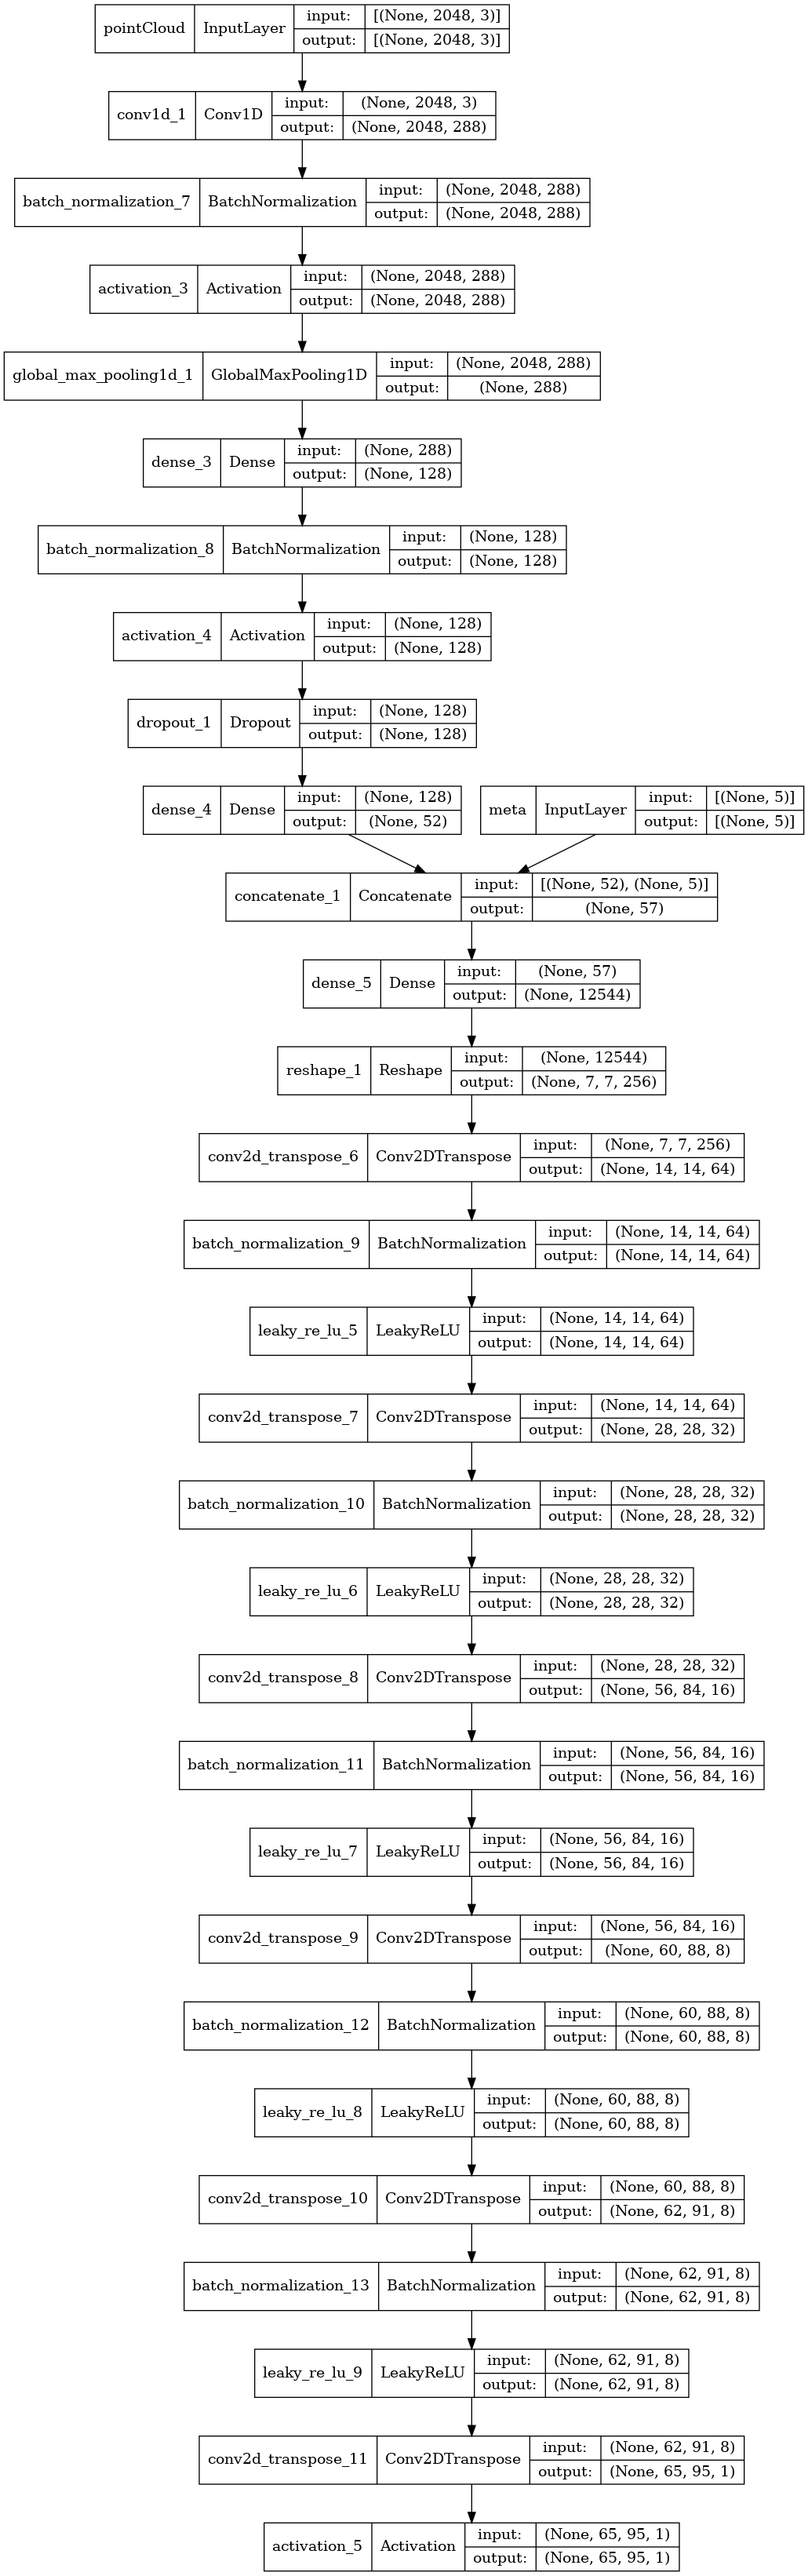

In [94]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

keras.utils.plot_model(model, show_shapes=True)


In [95]:
from tensorflow.keras.callbacks import EarlyStopping

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)

best_history = model.fit(
   {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, Y_fit,
    epochs = 100,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, Y_test),
    callbacks=[estop]
)

Epoch 1/100
30/30 [==============================] - 2s 30ms/step - loss: 0.2230 - mae: 0.3575 - val_loss: 1.1877 - val_mae: 0.8871
Epoch 2/100
30/30 [==============================] - 0s 17ms/step - loss: 0.0583 - mae: 0.1226 - val_loss: 0.4749 - val_mae: 0.5399
Epoch 3/100
30/30 [==============================] - 0s 17ms/step - loss: 0.0445 - mae: 0.1010 - val_loss: 0.9522 - val_mae: 0.8067
Epoch 4/100
30/30 [==============================] - 0s 17ms/step - loss: 0.0425 - mae: 0.0956 - val_loss: 0.4837 - val_mae: 0.5148
Epoch 5/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0361 - mae: 0.0830 - val_loss: 0.4577 - val_mae: 0.4874
Epoch 6/100
30/30 [==============================] - 0s 17ms/step - loss: 0.0319 - mae: 0.0770 - val_loss: 0.4673 - val_mae: 0.4812
Epoch 7/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0343 - mae: 0.0769 - val_loss: 0.4463 - val_mae: 0.4698
Epoch 8/100
30/30 [==============================] - 0s 17ms/step - loss: 0.

In [96]:
import pandas as pd

def plot_history(history:dict):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    # plt.ylim(0., 5.)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

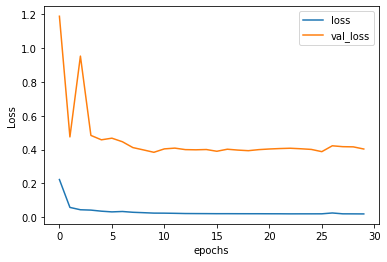

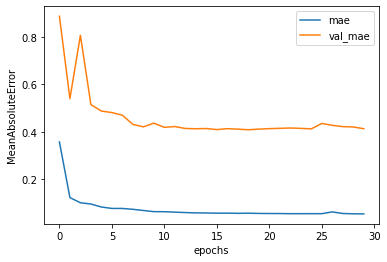

In [97]:
plot_history(best_history.history)

In [98]:
Y_train_pred = model.predict({'pointCloud':X_pc_train, 'meta':X_meta_train})
Y_val_pred = model.predict({'pointCloud':X_pc_val, 'meta':X_meta_val})
Y_test_pred = model.predict({'pointCloud':X_pc_test, 'meta':X_meta_test})

In [99]:
Y_train_pred = Y_train_pred.reshape(-1 , max_height, max_width)
Y_val_pred = Y_val_pred.reshape(-1 , max_height, max_width)
Y_test_pred = Y_test_pred.reshape(-1 , max_height, max_width)

In [100]:
import importlib
import show_mod
importlib.reload(show_mod)

<module 'show_mod' from '/home/i9-10920x/ML/modules/show_mod.py'>

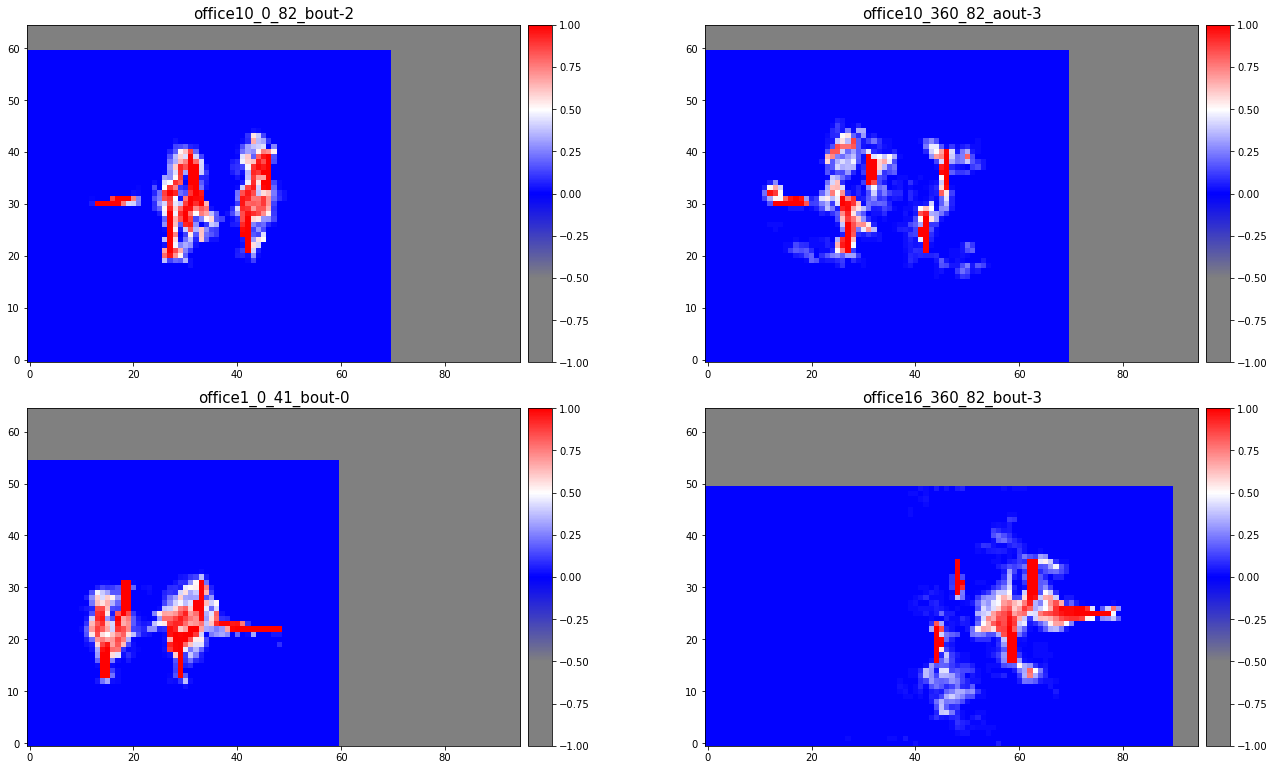

In [101]:
#訓練データの正解値
# train_target_2D = train_target.to_numpy()
# train_target_3D = train_target_2D.reshape(-1 , max_num_row, max_num_column)
show_mod.show_images(Y_train, title_name=case_index_train, row=2, column=2, cmap=cmap, cbar=True)

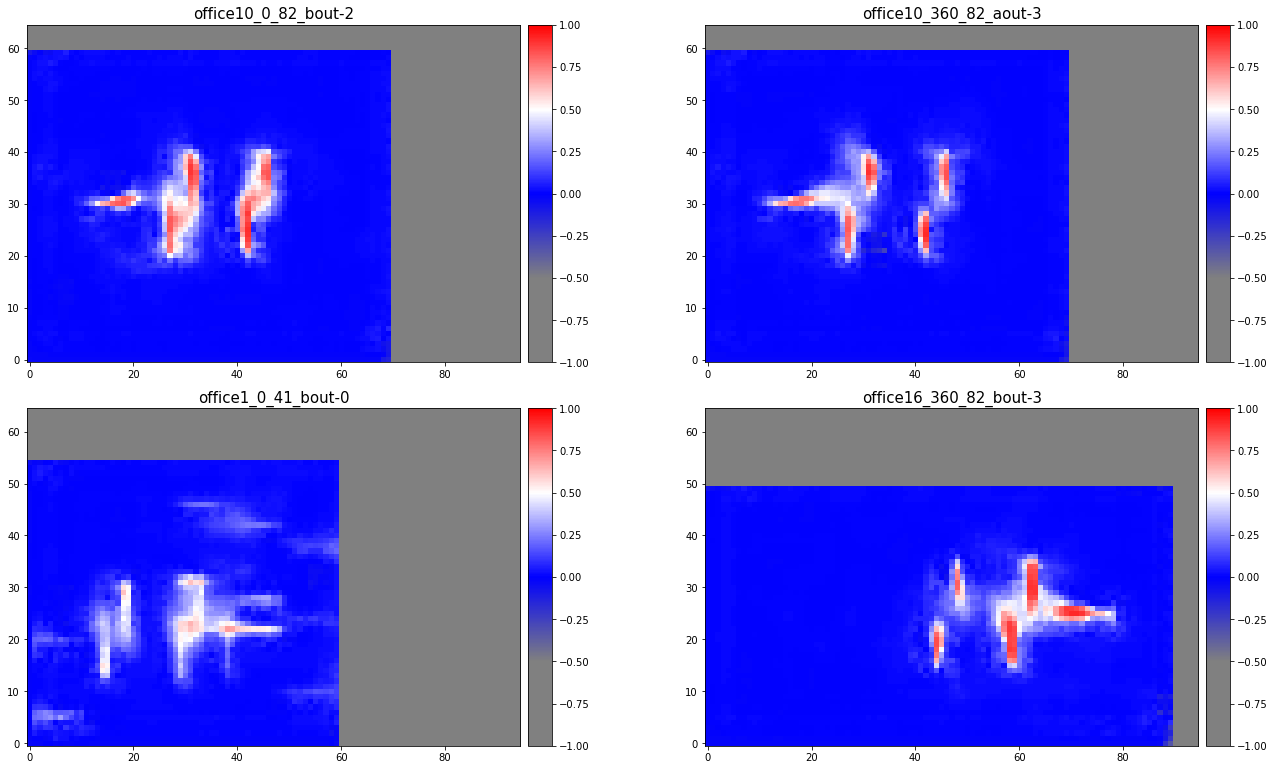

In [102]:
#訓練データの予測値
# predict_2D = model.predict(test_data, verbose=0)
# predict_3D = predict_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_train_pred, title_name=case_index_train, row=2, column=2, cmap=cmap, cbar=True)

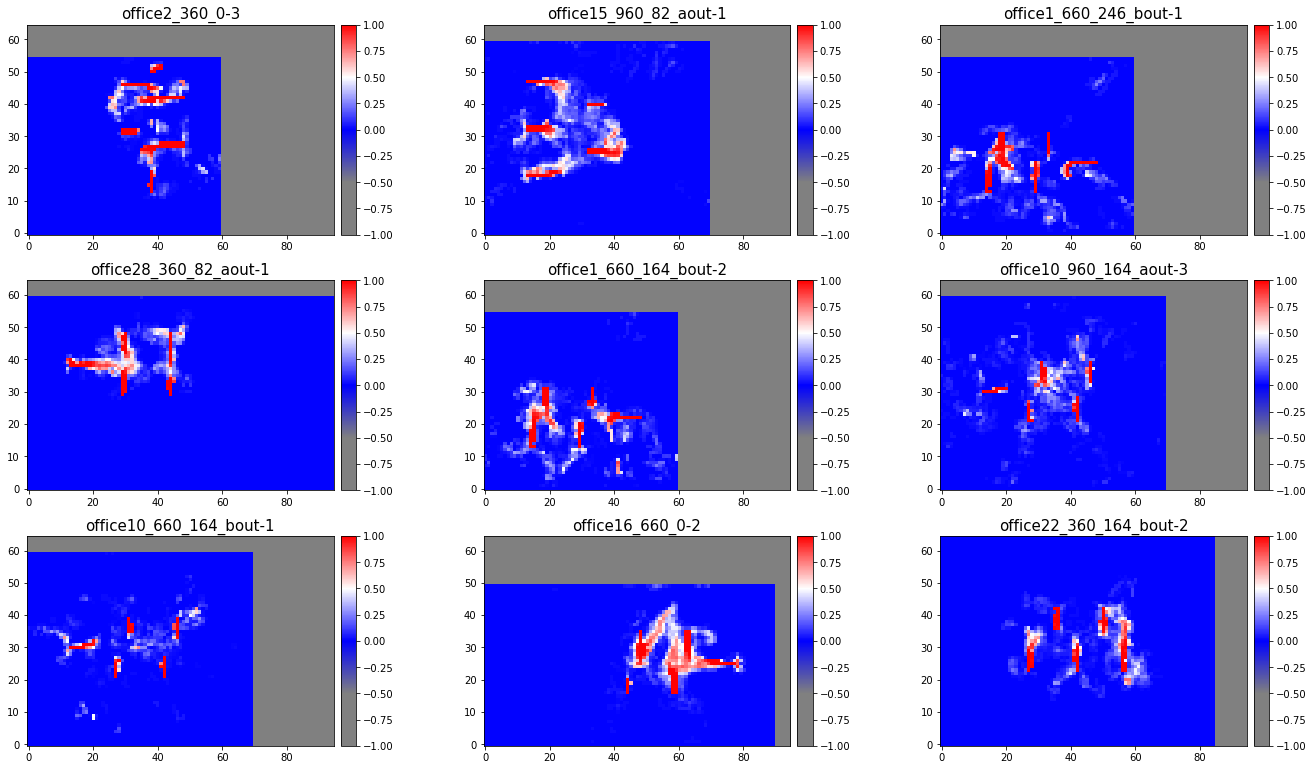

In [103]:
#検証データの正解値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_val, title_name=case_index_val, row=3, column=3, cmap=cmap, cbar=True)

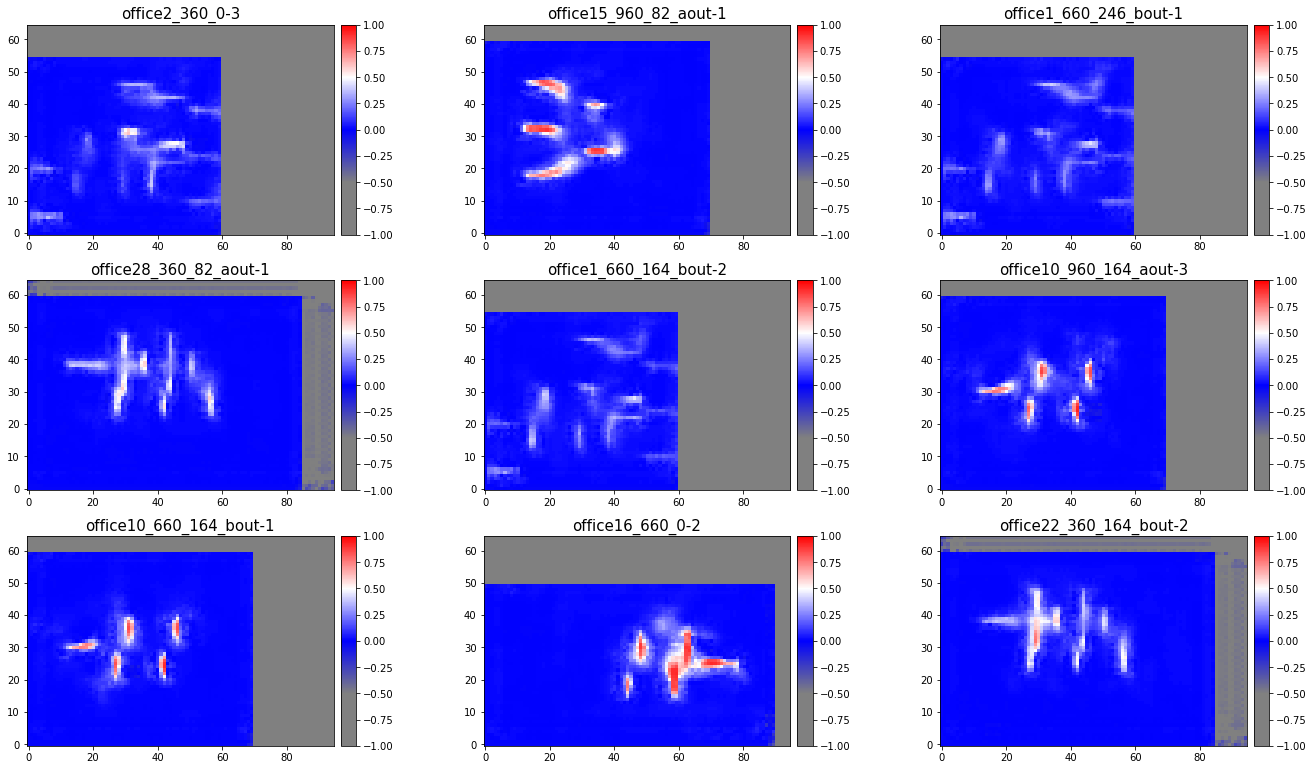

In [104]:
#検証データの予測値
# predict_2D = model.predict(test_data, verbose=0)
# predict_3D = predict_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_val_pred, title_name=case_index_val, row=3, column=3, cmap=cmap, cbar=True)

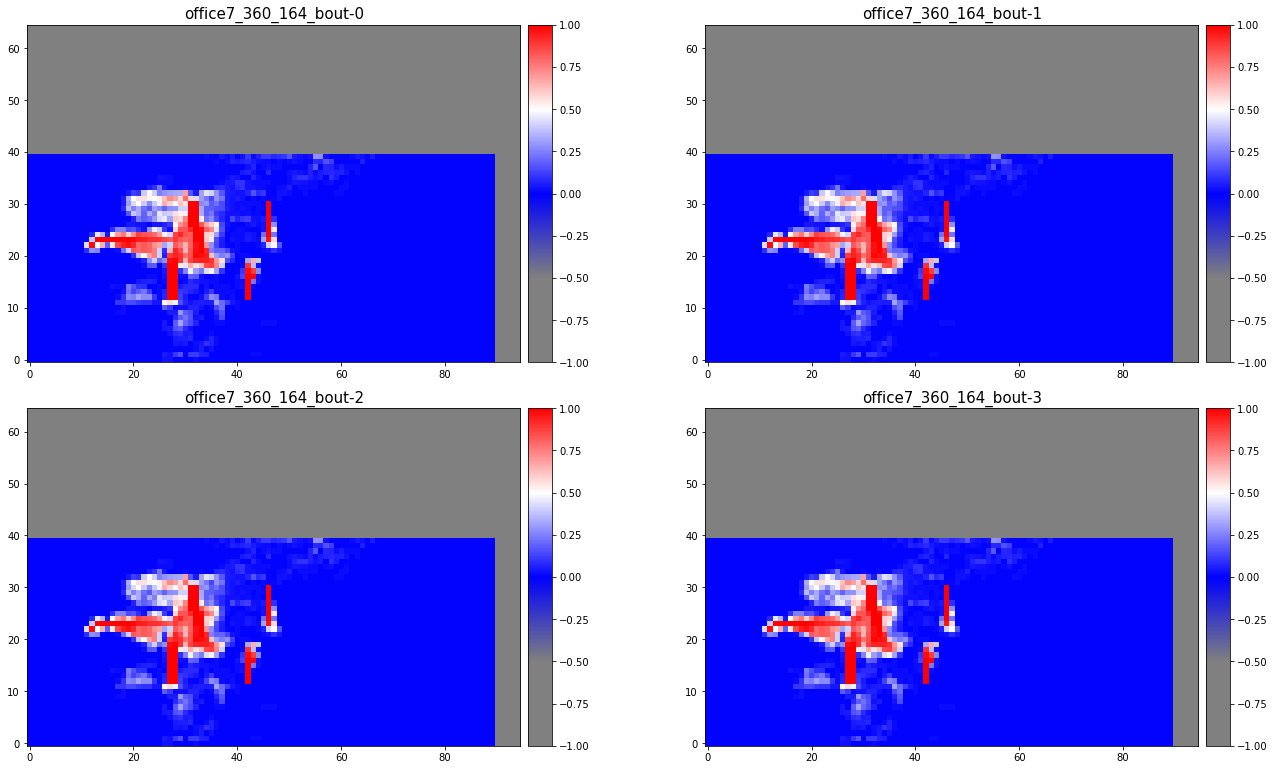

In [105]:
#テストデータの正解値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_test, title_name=case_index_test, row=2, column=2, cmap=cmap, cbar=True)

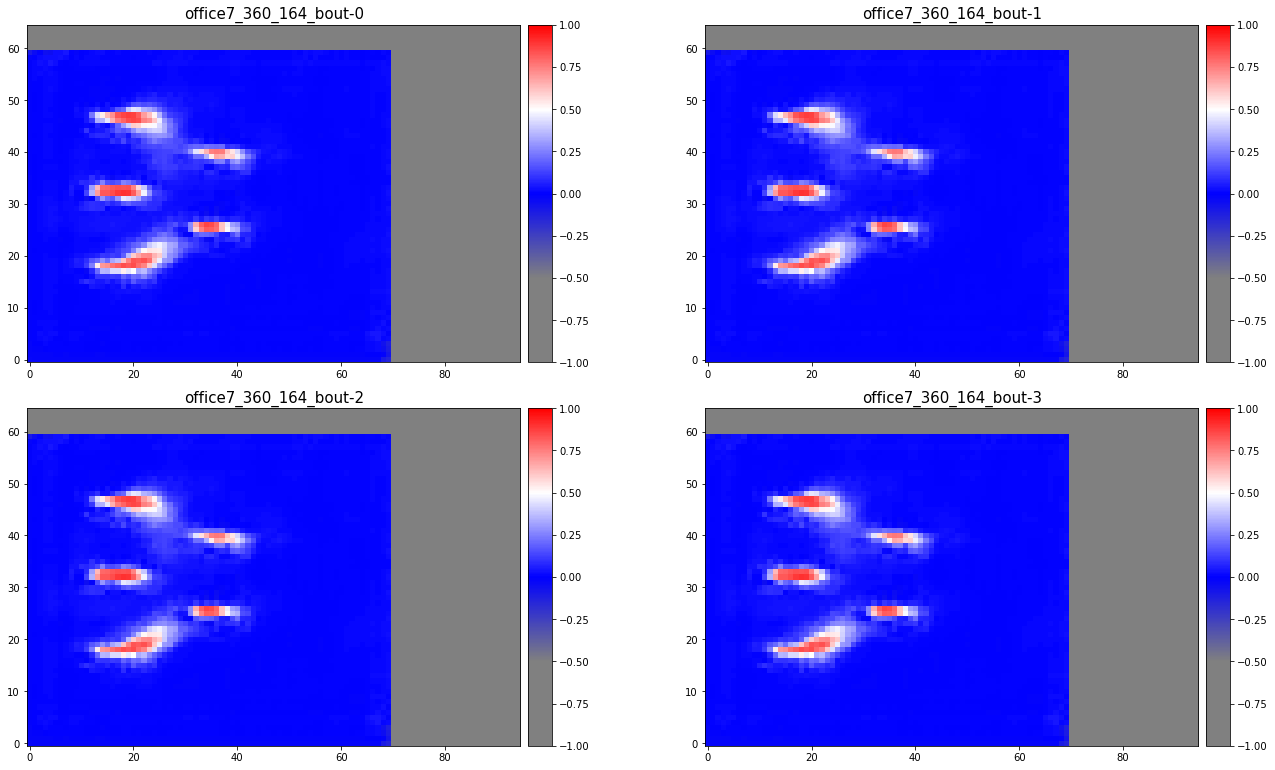

In [106]:
#テストデータの予測値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_test_pred, title_name=case_index_test, row=2, column=2, cmap=cmap, cbar=True)